In [35]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import folium as fl

mpl.style.use(['fivethirtyeight'])

In [36]:
# Calling the data directly from the github repository
json_data = pd.read_json('https://raw.githubusercontent.com/theand9/data-viz-challenge/master/data.json')

# Normalizing data so as to use it in standard pandas.Dataframe format
json_sorted_data = pd.json_normalize(json_data['data'])

# Checking if the data is in the desired format
json_sorted_data.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN


In [37]:
# Separating/ Cleaning data according to the given constraints
d = json_sorted_data[(json_sorted_data['category'] == 'Sports') | (json_sorted_data['category'] == 'Environment')]

# Number of entries still present
d.head(21000)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,33.794055,Atlanta,GA,-84.377326,30308,NaN
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,40.189788,Lyons,CO,-105.355280,80540,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Environment,Fund Project,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,33.760505,Atlanta,GA,-84.399626,30313,23.0
49989,Sports,Fund Project,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,39.872535,Westminster,CO,-105.034487,80030,37.0
49994,Environment,Fund Project,F,35-44,single,dbe304febcd94d768740237f37e918cd,android,1396309700,27.457947,Sebring,FL,-81.373012,33870,35.0
49995,Sports,Fund Project,F,18-24,married,412b973788704c36a008a506cdbba033,iOS,1396309720,45.343615,West Linn,OR,-122.664926,97068,35.0


iOS        12949
android     7130
Name: device, dtype: int64


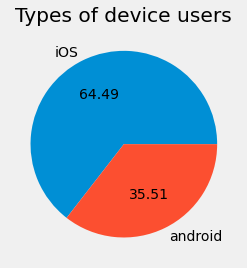

In [38]:
#Creates a visualization for what type of users show greater interests in the project
count = d['device'].value_counts()
count.plot(kind = 'pie', autopct = '%.2f', labels = ['iOS', 'android'])
plt.ylabel('')
plt.title('Types of device users')
print(count)

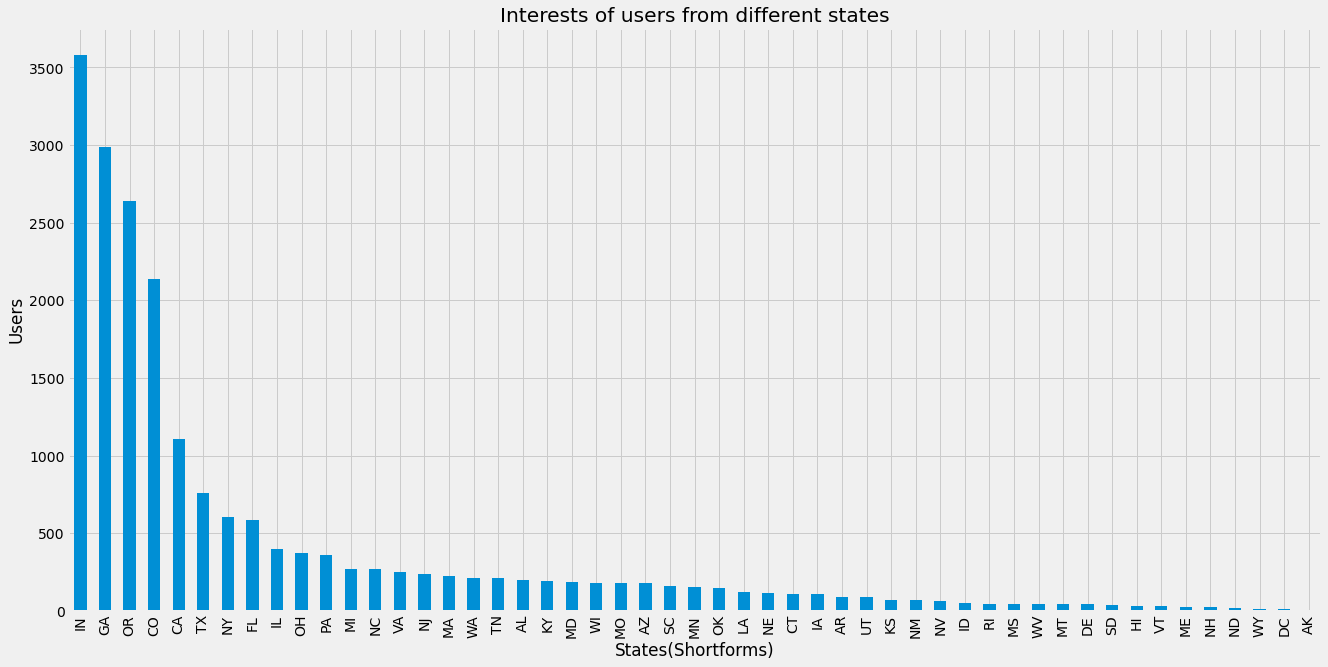

IN    3578
GA    2985
OR    2640
CO    2139
CA    1106
Name: location.state, dtype: int64

In [39]:
# A state-wise comparision of interests in the project
count_state = d['location.state'].value_counts()
count_action = d[['location.state', 'event_name']].value_counts()
count_state.plot(kind = 'bar', figsize = (20, 10))
plt.title('Interests of users from different states')
plt.xlabel('States(Shortforms)')
plt.ylabel('Users')
plt.show()
count_state.head()

San Antonio       69
Houston           65
El Paso           44
Dallas            36
Austin            32
                  ..
Richardson         1
Jacksonville       1
Gonzales           1
San Benito         1
Mount Pleasant     1
Name: location.city, Length: 140, dtype: int64


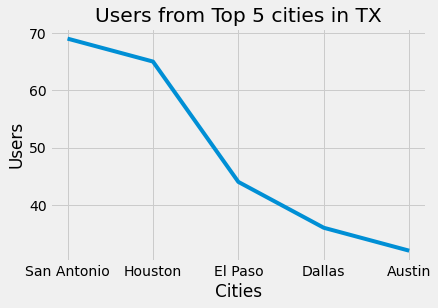

In [40]:
# Custom state-wise visualization for "View Project" & "Fund Project"
state_abbv = 'TX'  # Change the state code in this line to get visualizations for different states
state_data = d[d['location.state'] == state_abbv]
values = state_data['location.city'].value_counts()
values_top5 = values.head()
values_top5.plot(kind = 'line')
plt.title(f'Users from Top 5 cities in {state_abbv}')
plt.xlabel('Cities')
plt.ylabel('Users')
print(values)

F    9450
M    9212
U    1417
Name: gender, dtype: int64


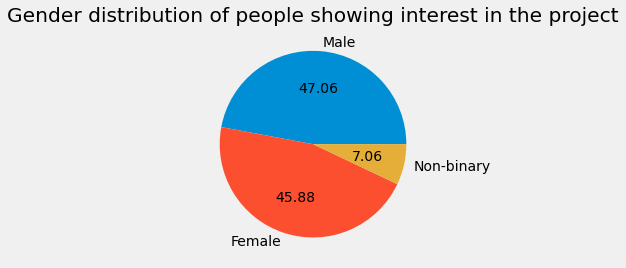

In [41]:
# Gender distribution of people showing interest in the project

dd = d['gender'].value_counts()
print(dd)
dd.plot(kind = 'pie',autopct = '%.2f', labels = ['Male', 'Female', 'Non-binary'])
plt.title('Gender distribution of people showing interest in the project')
plt.ylabel('')
plt.show()

In [42]:
x = list(dict.fromkeys(d['location.state'].to_list()))
print(x)

['CO', 'MA', 'MO', 'GA', 'OR', 'IN', 'MS', 'VT', 'NJ', 'CA', 'IL', 'VA', 'FL', 'PA', 'SC', 'WA', 'AZ', 'KY', 'MD', 'NE', 'TX', 'NY', 'TN', 'MI', 'WI', 'OH', 'CT', 'DE', 'MN', 'NC', 'IA', 'HI', 'WV', 'AR', 'NV', 'NH', 'UT', 'AL', 'LA', 'KS', 'NM', 'OK', 'SD', 'RI', 'ID', 'WY', 'MT', 'DC', 'ME', 'AK', 'ND']


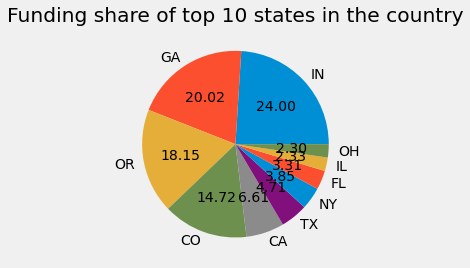

In [43]:
# Comparision of

funded = d[d['event_name'] == 'Fund Project']
funded.head()
count_fund = funded[['location.state', 'amount']]
state_total = {'state': [], 'amount': []}
for name in x:
    f = count_fund[count_fund['location.state'] == name]
    state_total['state'].append(name)
    state_total['amount'].append(f['amount'].sum())
a = pd.DataFrame.from_dict(state_total)
aa = a.sort_values(by = 'amount', ascending = False)
aaa = aa.set_index('state')
top10 = aaa.head(10)
last41 = aaa.tail(41)
top10['amount'].plot(kind = 'pie', autopct = '%.2f')
plt.title('Funding share of top 10 states in the country')
plt.ylabel('')
plt.show()

In [44]:
heatmap = d[d['age']=='18-24']
heatmap.head(20000)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393632171,33.794055,Atlanta,GA,-84.377326,30308,NaN
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,40.189788,Lyons,CO,-105.355280,80540,31.0
20,Environment,View Project,F,18-24,married,ba5a2f05fac84d5a8e4e7132fe1a47b9,iOS,1393632222,39.863369,Arvada,CO,-105.172429,80007,NaN
21,Sports,View Project,U,18-24,married,be389e9be0e74398adcef3292ac409ee,android,1393632233,45.408374,Lake Oswego,OR,-122.691388,97034,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,Environment,Fund Project,F,18-24,married,9cfc3e2e399a43dbbdad0bc5fff3621b,iOS,1396308135,40.094787,Boulder,CO,-105.278083,80301,43.0
49981,Sports,Fund Project,F,18-24,single,6fd296b7c5b34eaa829b3f5482ea56cc,android,1396308417,40.067772,Boulder,CO,-105.274840,80303,48.0
49984,Environment,Fund Project,M,18-24,married,584713f5385a4ce2b881e877f1fa9a80,android,1396308722,33.760505,Atlanta,GA,-84.399626,30313,23.0
49989,Sports,Fund Project,M,18-24,single,4829aa471c6b431fa023076746f7476f,iOS,1396309022,39.872535,Westminster,CO,-105.034487,80030,37.0


In [93]:
# Using Geo spatial data, mapping out pinpointed locations of fundings in a given state with a pop up giving the amount funded

m = fl.Map(location=[37.0902, -95.7129], zoom_start = 4)
places = fl.map.FeatureGroup()
state_name = 'FL' # Change state name to get maps of different states
state_data = d[(d['location.state']==state_name) & (d['event_name']=='Fund Project')]
for i in state_data.index:
    places.add_child(
        fl.features.Marker([float(state_data['location.latitude'][i]), float(state_data['location.longitude'][i])], radius = 5, color = 'red', fill_color = 'red')
    )
    m.add_child(places)
    fl.Marker([float(state_data['location.latitude'][i]), float(state_data['location.longitude'][i])], popup = state_data['amount'][i]).add_to(m)
m